# 1000 cameras dataset

First we will import necessary libraries and read in the dataset. After that, we will transform the dataset into a pandas dataframe so it is easier to work with. Then we check for null values in the data and drop them. 


In [89]:
# import libraries
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import qqplot

# read in dataset
camera = pd.read_csv("camera_dataset.csv")

# transform into  pandas dataframe
camera_df = pd.DataFrame(camera)

# check for null values and drop them as these only occur in 2 rows
camera_df.isnull().sum()
camera_drop_zero = camera_df.dropna(axis = 0, how = 'any')

#delete years 1994 and 1995 as there is not much data available
camera_new = camera_drop_zero.drop(camera_drop_zero.index[[0, 1]])

camera_new.head()

print(camera_new.shape)

#check if any null values are left
#print(camera_new.isnull().sum())

#make dataframe that is sorted for date and price, drop 1994 and 1995
camera_sorted = camera_new.sort_values(by = "Release date")
camera_sorted = camera_sorted.drop(camera_sorted.index[[0, 1]])

#print(camera_sorted.isnull().sum())
print(camera_sorted.shape)

#get a broad overview of the data
print(camera_sorted.describe())


(1034, 13)
(1032, 13)
       Release date  Max resolution  Low resolution  Effective pixels  \
count   1032.000000     1032.000000     1032.000000       1032.000000   
mean    2003.614341     2475.996124     1780.498062          4.599806   
std        2.686408      757.806089      825.872879          2.840015   
min     1996.000000        0.000000        0.000000          0.000000   
25%     2002.000000     2048.000000     1130.500000          3.000000   
50%     2004.000000     2560.000000     2048.000000          4.000000   
75%     2006.000000     3072.000000     2560.000000          7.000000   
max     2007.000000     5616.000000     4992.000000         21.000000   

       Zoom wide (W)  Zoom tele (T)  Normal focus range  Macro focus range  \
count    1032.000000    1032.000000         1032.000000        1032.000000   
mean       33.009690     121.794574           44.188953           7.777132   
std        10.256549      93.571554           24.118366           8.046226   
min     

It is interesting that as min values we have 0 for almost all columns. Whether this is due to unkown values or in fact 0 values in the cameras is not clear. We will look at how many zeros there are per column. We will look at what Release date most of the zero data comes from to see if this comes from some technological development.

Following this, we have a look on the shape of the dataset and the columns. Also we look on the development of price over time.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(1032, 13)
Index(['Model', 'Release date', 'Max resolution', 'Low resolution',
       'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)',
       'Normal focus range', 'Macro focus range', 'Storage included',
       'Weight (inc. batteries)', 'Dimensions', 'Price'],
      dtype='object')


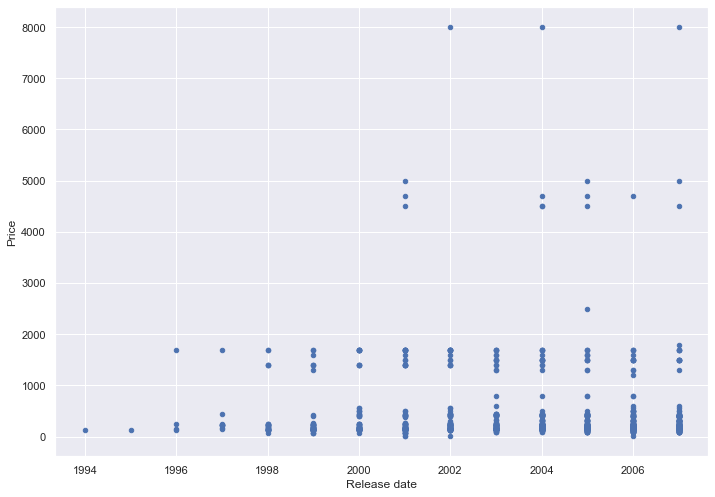

Model                        0
Release date                 0
Max resolution               1
Low resolution              53
Effective pixels            34
Zoom wide (W)               85
Zoom tele (T)               85
Normal focus range         137
Macro focus range          126
Storage included           123
Weight (inc. batteries)     21
Dimensions                  14
Price                        0
dtype: int64


,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
Release date,,,,,,,,,,,
1994,0,1,0,1,1,1,1,1,0,0,0
1995,0,1,0,1,1,1,1,1,0,0,0
1996,0,0,4,0,0,0,0,0,0,0,0
1997,0,3,8,0,0,0,0,1,1,0,0
1998,0,4,9,3,3,3,6,3,2,2,0
1999,0,4,9,4,4,8,13,5,4,3,0
2000,0,3,2,4,4,5,6,4,4,4,0
2001,0,6,2,5,5,5,8,5,0,0,0
2002,0,3,0,6,6,8,10,11,2,2,0


In [90]:
print(camera_sorted.shape)
print(camera_new.columns)


columns_without_price_date_model = []


for column in camera_new.columns :
        if column != "Release date" and column != "Price" and column != "Model":
            columns_without_price_date_model.append(column)

  
camera_new.plot(x = "Release date", y = "Price", kind = "scatter")

plt.show()

#camera_new.head()

camera_new.describe()

#counting how many 0 values there are in the columns
print((camera_new == 0).sum(axis=0))

list_of_props = ['Max resolution', 'Low resolution',
       'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)',
       'Normal focus range', 'Macro focus range', 'Storage included',
       'Weight (inc. batteries)', 'Dimensions', 'Price']




#looking for 0 valued cameras and from what year they are
#grouped_year = camera_new.groupby("Release date").min()

grouped_year = camera_new.groupby('Release date')[list_of_props].apply(lambda x: x[x == 0].count())

grouped_year

When looking on the development of prices over time, it is visible, that prices stayed somewhere between 10-2000 Dollar. Only a few cameras are outliers with prices up to 8000 Dollar. 

When looking on the columns of the dataset, we can see that there are 13 columns. In the following I am going to shortly summarize the meaning of these columns : 
- Model: name of the model of the camera
- Release date: date of release of the camera
- Max resolution: highest dimension in pixel
- Low resolution: lowest dimensions in pixel
- Effective pixels:  is a measurement of the number of pixels that actively record the photographic image within a sensor. As an example, a camera might hold a sensor containing 10.5 megapixels, but they have an effective pixel count of 10.2 megapixels.
- Zoom wide (W): zoom wide refers to the ability of a camera to zoom into width. The data refers to the size of the lens in mm. 
- Zoom tele (T): zoom tele refers to the length of the lens and its ability to zoom into distance. The data refers to the size of the lens in mm. The larger Zoom tele is, the higher is the magnification capability of the camera.
- Normal focus range: It refers to the size of normal lens focal lenghts in mm (which is a calculation of an optical distance from the point where light rays converge to form a sharp image of an object to the digital sensor).The shorter the focal length, the wider the angle of view and the lower the magnification.
- Macro focus range: is the nearest distance between the camera and the subject such that the camera can take clear and in-focus shots. It is denominated in mm.
- Storage included: Local camera storage included
- Weight (inc.batteries): weight of the camera including bateries
- Dimensions: Length and width of the camera
- Price: Price of the camera

As we can see from the zero value count there are a lot of cameras that have zero valued properties. As there are a zeros values in all years, it is not clear if that is due to newer cameras not having e.g. a lense included or due to the fact that there are less data points in the years before 2000 (as we will later find out).
We will assume that the zero values are indeed zero and are not due to missing data.

Next, it would be interesting to know how the median and mean of camera prices developed over time and also how many cameras per year we have in the dataset.

Release date
1994      1
1995      1
1996      4
1997     10
1998     31
1999     53
2000     61
2001     85
2002     89
2003    101
2004    141
2005    143
2006    152
2007    162
Name: Model, dtype: int64


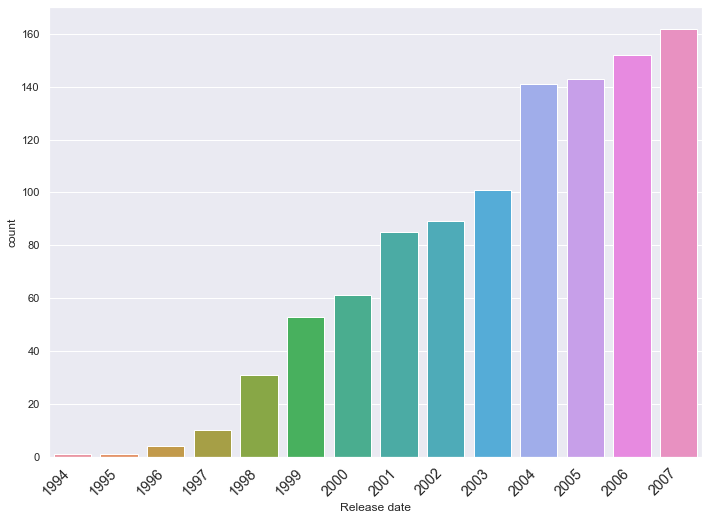

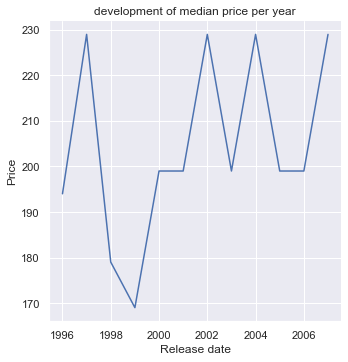

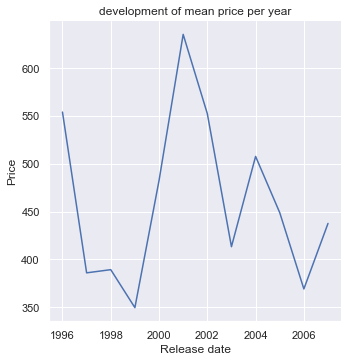

In [91]:
#print how many models per year the dataset has
camera_new_grouped_bydate_copy = camera_new.groupby("Release date")["Model"].count()

print(camera_new_grouped_bydate_copy)

#making barplot from number of cameras per year
countplot = sns.countplot(x = "Release date", data = camera_new)
countplot.set_xticklabels(countplot.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')



#median and mean of price over time
mean_camera = camera_sorted.groupby("Release date").mean()

median_camera = camera_sorted.groupby("Release date").median()

sns.relplot(x = "Release date", y = "Price", data = median_camera, kind = "line")
plt.title("development of median price per year")

sns.relplot(x = "Release date", y = "Price", data = mean_camera, kind = "line")
plt.title("development of mean price per year")

plt.show()

In the countplot we can clearly see, that there are a lot more cameras in the dataset in the later years than in the earlier years. If that comes from the method of data collection or from the fact that there were less cameras released in the 1990's is not clear. It is definitely important to keep this fact in mind as we proceed with our analysis, as it can affect later results. 

The median and mean of price dont seem to have a clear trend.

Now we are going to look at the different camera properties and how they have developed over time. 

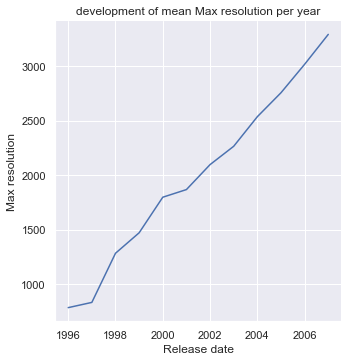

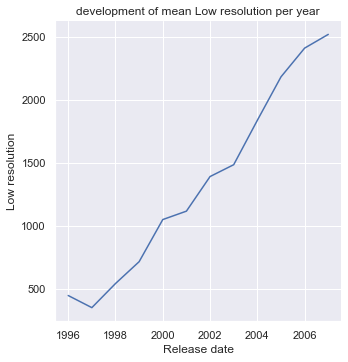

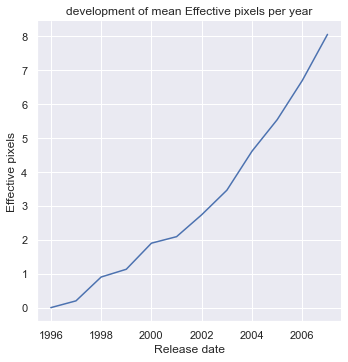

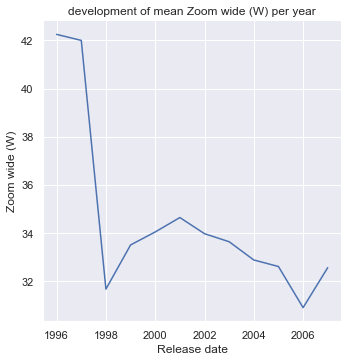

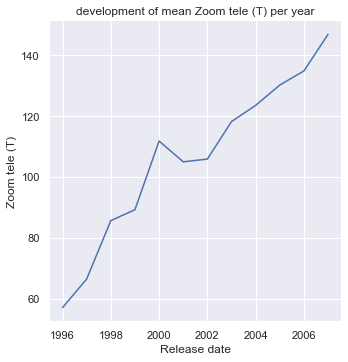

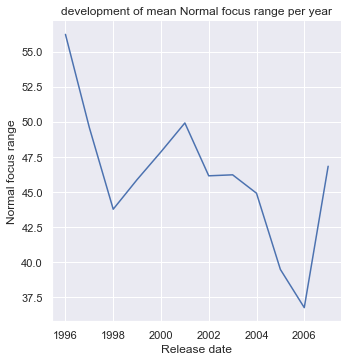

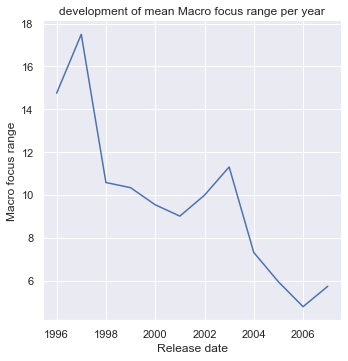

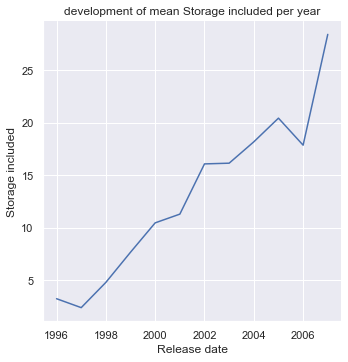

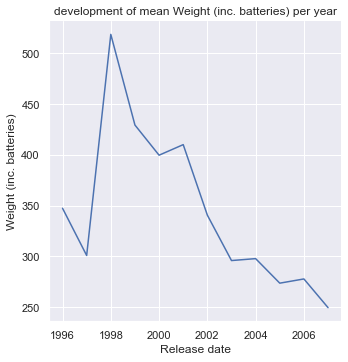

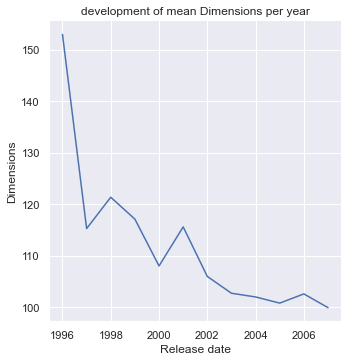

In [92]:
#different properties 

# sns.relplot(x = "Release date", y = "Effective pixels", data = mean_camera, kind = "line")
# plt.title("development of pixels per year")

for properties in columns_without_price_date_model :
    sns.relplot(x = "Release date", y = f"{properties}", data = mean_camera, kind = "line")
    plt.title(f"development of mean {properties} per year")
    plt.show


We saw that development of max and low resolution, effective pixels per year, zoom tele and storage included, all increased over time.

At the same time zoom wide, normal focus range, macro focus range, weight development and the dimensions of cameras had downward trends.

Now we are going to check if there is a relationship between the different properties and the price of a camera.

The lowest price is 14.0
The lowest price is 7999.0
The mean price is 459.0998062015504
The median price is 199.0
The standard deviation price is 762.3262033221365


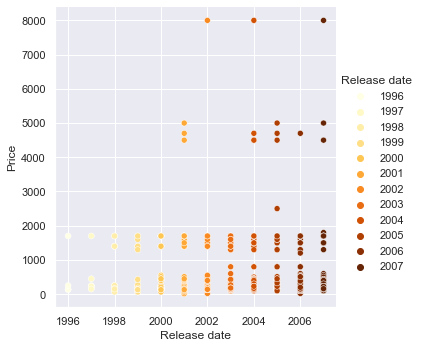

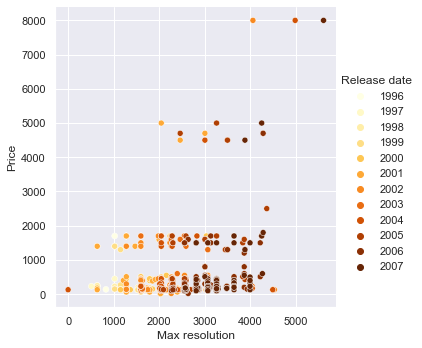

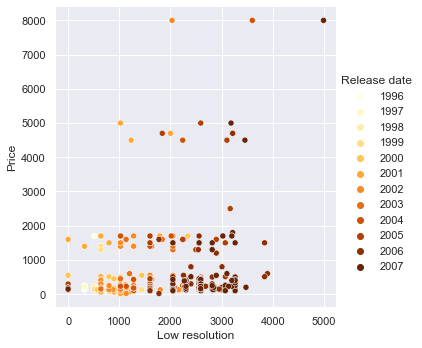

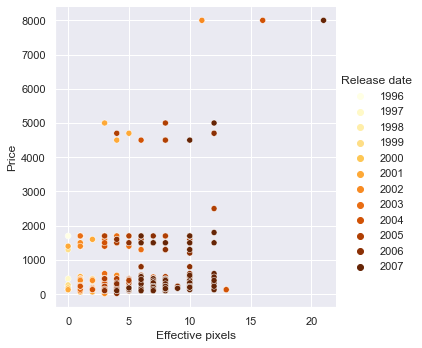

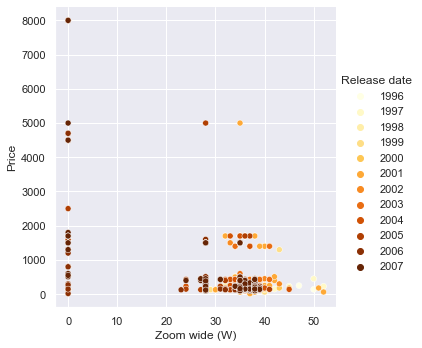

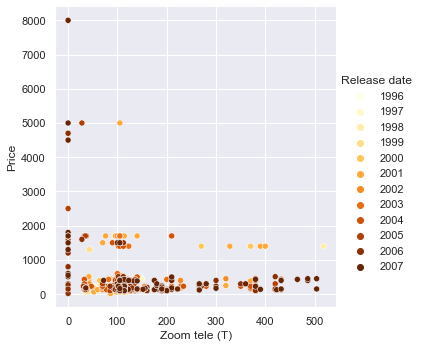

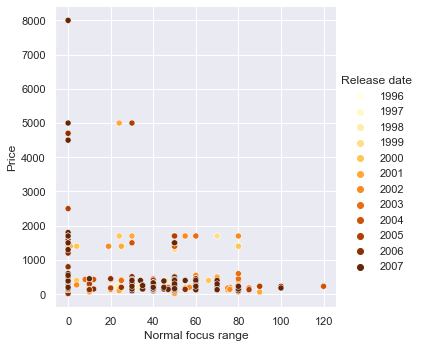

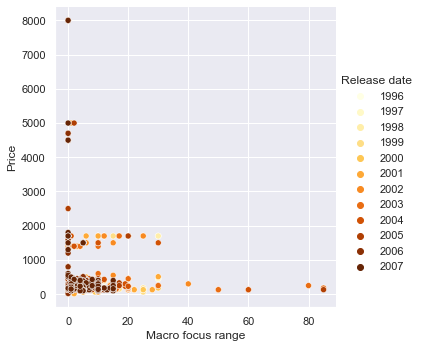

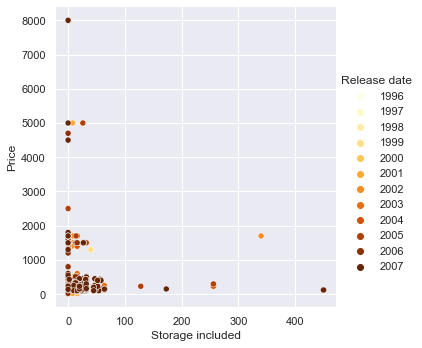

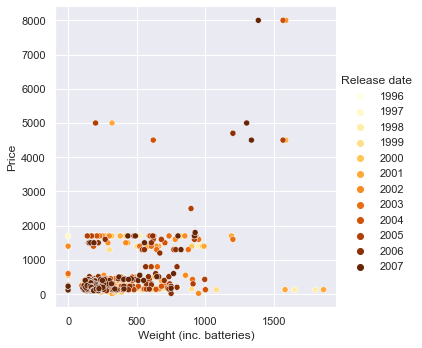

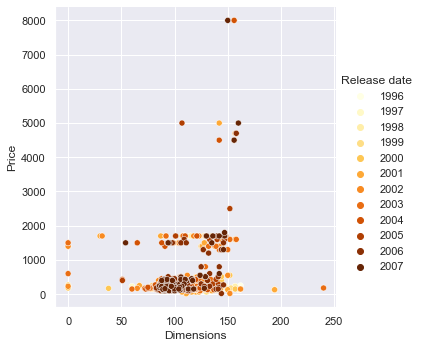

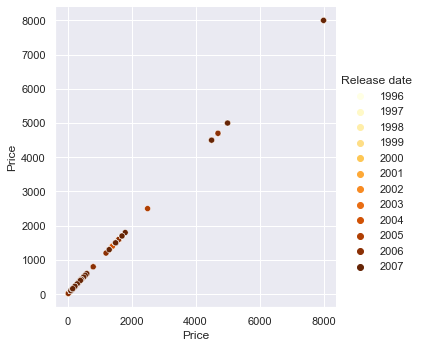

In [93]:
#list with columns
columns_without_model = []

#look at the highest and the lowest price
min_price_camera = camera_sorted["Price"].min()
max_price_camera= camera_sorted["Price"].max()
mean_price_camera = camera_sorted["Price"].mean()
median_price_camera = camera_sorted["Price"].median()
std_price_camera = camera_sorted["Price"].std()

print(f"The lowest price is {min_price_camera}")
print(f"The lowest price is {max_price_camera}")
print(f"The mean price is {mean_price_camera}")
print(f"The median price is {median_price_camera}")
print(f"The standard deviation price is {std_price_camera}")

#exclude columns release date and model
for column in camera_sorted.columns :
        if column != "Model":
            columns_without_model.append(column)

#make scatterplots for propertiess
for properties in columns_without_model :

    sns.relplot(x = f"{properties}" , y = "Price", data = camera_sorted, kind = "scatter", hue = "Release date", legend='full', palette = "YlOrBr")
    plt.show

Interestingly the scatterplots seem to have similar patterns. There are a some extreme outliers though for datapoints that have a price above 2000. Also we can observe, that properties as e.g. effective pixels have increased in time, while the prices have stayed relatively constant.
It is also interesting that there seems to be a gap between cameras that cost less than 1000$ and cameras, that are more than 1000$. At the same time it looks like even with the price differences, most of the cameras have the same quality in properties. Meaning that price is not necessarily a factor for quality. 

Next we can visualize what how many brands are in the dataset and how many cameras they released and how the companies differ in price.




(((In order to perform a multiple linear regression the following assumptions must hold:
-Linear relationship
-Multivariate normality
-No or little multicollinearity
-No auto-correlation
-Homoscedasticity

first we check whether the data is gaussian distributed. )))


=> price by brand in a better plot? maybe boxplot per brand
order brands with groupby and show mean price

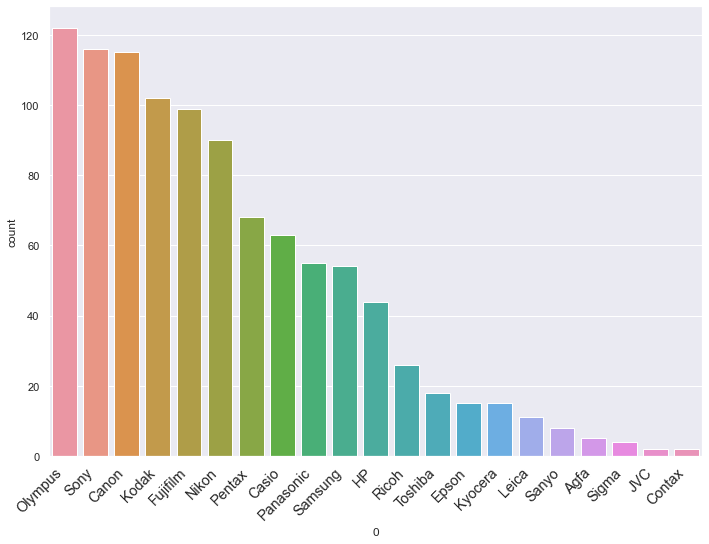

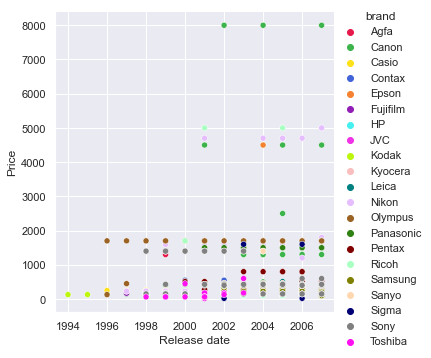

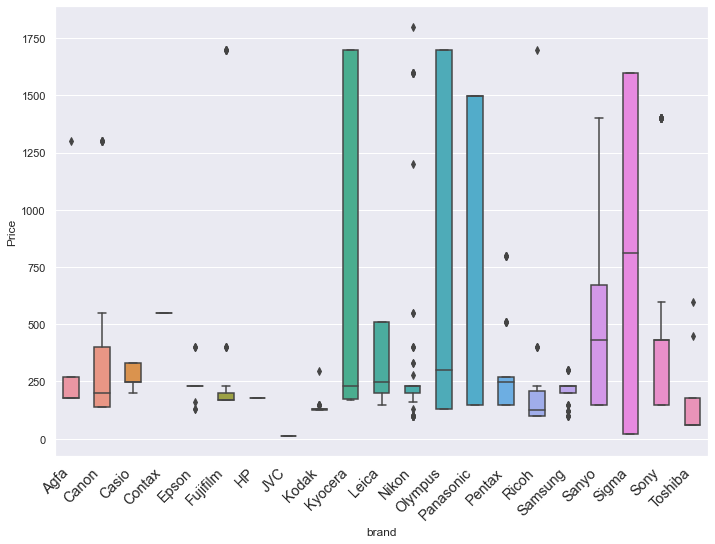

In [99]:
#split the Brand from the model name
camera_brands = camera_new["Model"].str.split(" ", n = 1, expand = True)

#count how many cameras there are per brand
camera_brands["count"] = camera_brands[0].count()

#make countplot from brands
countplot_brands = sns.countplot(x = camera_brands[0], data = camera_brands, order = camera_brands[0].value_counts().index)
#styling
countplot_brands.set_xticklabels(countplot_brands.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large',)

#making column in camer_new with brands
camera_new["brand"] = camera_brands[0]


camera_group_brands = camera_new.groupby("Release date")["brand"].count()

camera_group_brands



#creating color palette for brands
brand_palette = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#308113', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#FF10F0']

#making scatterplot
sns.relplot(x = camera_new["Release date"] , y = "Price", data = camera_new, kind = "scatter", hue = "brand", legend='full', palette = brand_palette)

plt.show()

#exclude prices above 2000 dollar to make distributoin more visble
camera_excluded = camera_new[camera_new['Price'] <= 2000]  

#boxplot to show distribution of price in brands
boxplot_brand = sns.boxplot(x = "brand", y = "Price", data = camera_excluded, width=0.5)

boxplot_brand.set_xticklabels(boxplot_brand.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large',)

sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.show()

We can see, that 

In [95]:
# #take out release date
# camera_sorted_without_release = camera_sorted.drop("Release date", 1)

# #take out rows with price bigger than 2000
# camera_sorted_without_release = camera_sorted_without_release[camera_sorted_without_release['Price'] <= 2000]  

# print(camera_sorted_without_release.dtypes)

# # Plot the histograms
# camera_sorted_without_release.hist(bins = 20, figsize = (15,20))


# # q-q plot
# #qqplot(camera_sorted_without_release, line='s')



Unfortunately only the property "Max resolution" seems close to a normal distribution. So a multiple linear regression would not make much sense here.

would a WLS work?

In [96]:
pd.plotting.scatter_matrix(camera_sorted_without_release, figsize = (20,20))

NameError: name 'camera_sorted_without_release' is not defined